In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    return(Y_model)

# Support Vector Classifier

## Téléchargement des données

In [3]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v2.csv")

## Pre-processing
On sépare la variable à expliquer des variables explicatives.

In [4]:
X = train.drop(columns = 'Response')
Y = train['Response']

On sépare les données en train et test puis on les scale avec les méthodes de sklearn.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index)

## Implémentation

On applique ensuite directement notre modèle :

Le f1 score vaut 0.14808206958073147


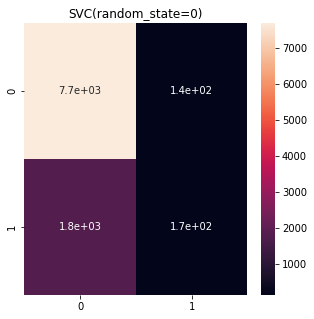

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
clf = SVC(random_state=0).fit(X_scal_train, Y_train)
result_model(clf, X_scal_test, Y_test)

En testant avec de la cross-validation les résultats ne sont améliorés.

In [ ]:
X_scal = scaler.fit_transform(X)

clf = SVC(random_state=0)
scores = cross_val_score(clf, X_scal, Y, cv=5, scoring='f1')
print("F1 moyen de %0.2f avec un écart type de %0.2f" % (scores.mean(), scores.std()))

F1 moyen de 0.22 avec un écart type de 0.02


## Conclusion

Ici encore le résultat n'est pas satisfaisant, on retrouve le même comportement que pour la régression logistique, pis encore, l'entrainement du SVC est beaucoup plus long que la détermination des coefficients de la régression, qui elle est presque instantanée. On constate encore bien que, quand bien même quelques entrées sont classées en 1, elles représentent une infime partie du jeu de données, de plus autant d'entrées classées en 1 sont correctement classées qu'incorrectement, ce qui laisse à penser que le modèle est complètement inefficace sur ce front.